# Title Excel with Python 
Project: kchaudhari

In [1]:
# Import necessary libraries and the whatif module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from whatif import Model
from whatif import get_sim_results_df

# 1a Base Model: Define the SingleProductSPF class from Model

In [2]:

class SingleProductSPF(Model):
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115, spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        super().__init__()
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
    
    # Calculate demand by using the selling price function (SPF)
    def demand(self):
        return self.spf_quadratic * self.selling_price ** 2 + self.spf_linear * self.selling_price + self.spf_constant
    
    # Calculate profit based on revenue and total cost
    def profit(self):
        revenue = self.selling_price * self.demand()
        total_cost = self.fixed_cost + self.var_cost * self.demand()
        return revenue - total_cost

    # Simulate profit with varying variable costs
    def simulate_profit(self, num_simulations, var_cost_range=(80, 120)):
        
        # Run simulation with a uniform distribution for variable cost
        random_inputs = {
            'var_cost': np.random.uniform(var_cost_range[0], var_cost_range[1], num_simulations)
        }
        outputs = ['profit']

        results = self.simulate(random_inputs=random_inputs, outputs=outputs)

        # Convert results to DataFrame
        results_df = get_sim_results_df(results)
        return results_df

# Create an instance of the model with a selling price of $115
model = SingleProductSPF(selling_price=115)
print("Demand:", model.demand()) 
print("Profit:", model.profit())


Demand: 1668.5
Profit: 20027.5


# 1b - One-Way Data Table

   selling_price   profit  demand
0             80 -54680.0  2484.0
1             90 -27360.0  2236.0
2            100  -5000.0  2000.0
3            110  12760.0  1776.0
4            120  26280.0  1564.0
5            130  35920.0  1364.0
6            140  42040.0  1176.0


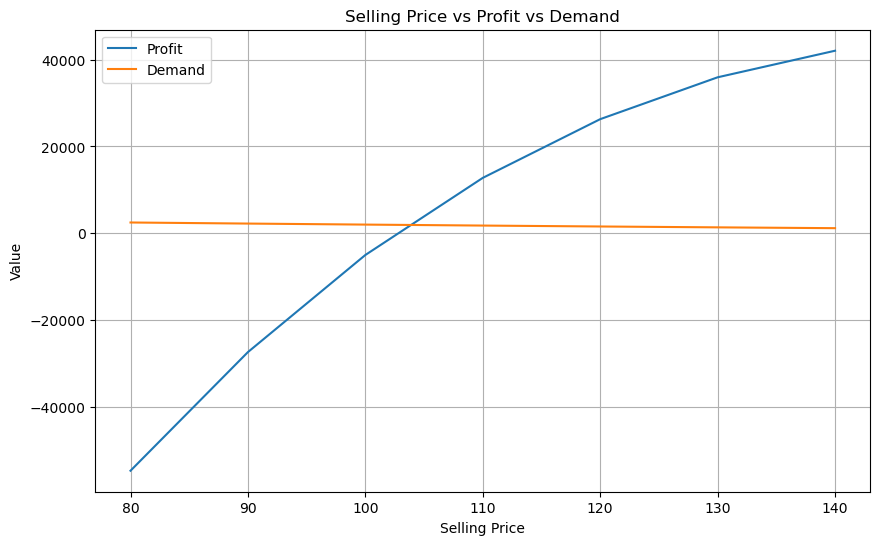

In [3]:
selling_prices = list(range(80, 141, 10))
scenario_inputs = {'selling_price': selling_prices}
outputs = ['profit', 'demand']

results_df = model.data_table(scenario_inputs, outputs)

print(results_df)

# Plot the results of the one-way data table
plt.figure(figsize=(10, 6))
plt.plot(results_df['selling_price'], results_df['profit'], label='Profit')
plt.plot(results_df['selling_price'], results_df['demand'], label='Demand')
plt.xlabel('Selling Price')
plt.ylabel('Value')
plt.title('Selling Price vs Profit vs Demand')
plt.legend()
plt.grid(True)
plt.show()


The demand graph seems fairly linear and decreasing a bit, while the profit graph is non-linear gradually increasing from negative to positive. Indicating the obvious as the selling price increases the profit increases while it has less effect on the demand. Infact the demand slightly decreases with increase in Selling price. Hence the nature of the graphs. 

# 1c - Break Even 

In [4]:
break_even_price = model.goal_seek(obj_fn='profit', target=0, by_changing='selling_price', a=80, b=140)
print("Break-even selling price:", break_even_price)

Break-even selling price: 102.57578606424767


# 1d – 2-way Data Table

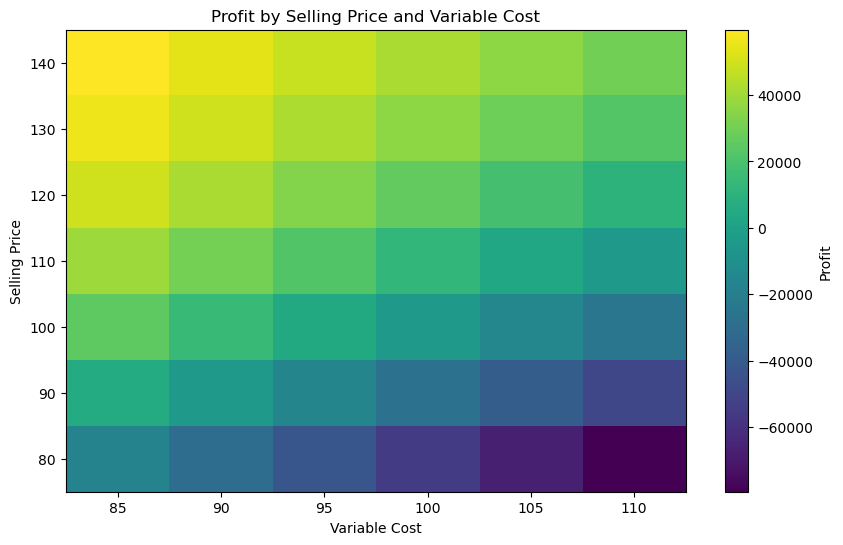

In [5]:
import seaborn as sns

variable_costs = list(range(85, 111, 5))
selling_prices = list(range(80, 141, 10))
scenario_inputs = {'selling_price': selling_prices, 'var_cost': variable_costs}
outputs = ['profit']

# Create the data table
results_df = model.data_table(scenario_inputs, outputs)

# Create a pivot table for visualization
pivot_table = results_df.pivot(index='selling_price', columns='var_cost', values='profit')

# Plotting the 2-way data table
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Profit')
plt.xticks(range(len(variable_costs)), variable_costs)
plt.yticks(range(len(selling_prices)), selling_prices)
plt.xlabel('Variable Cost')
plt.ylabel('Selling Price')
plt.title('Profit by Selling Price and Variable Cost')
plt.show()


# 1e – Digging Deeper

Goal seek did not find a solution.


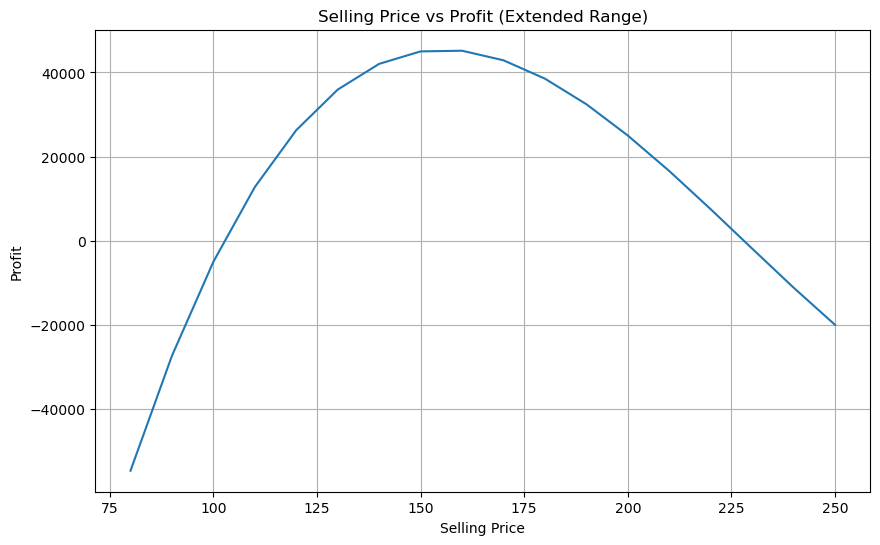

In [6]:

# Goal Seek with extended range
extended_break_even_price = model.goal_seek(obj_fn='profit', target=0, by_changing='selling_price', a=80, b=250)
if extended_break_even_price is None:
    print("Goal seek did not find a solution.")
else:
    print("Extended break-even selling price:", extended_break_even_price)

# Extended data table for selling price range $80-$250
extended_selling_prices = list(range(80, 251, 10))
scenario_inputs = {'selling_price': extended_selling_prices}
outputs = ['profit', 'demand']

extended_results_df = model.data_table(scenario_inputs, outputs)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(extended_results_df['selling_price'], extended_results_df['profit'], label='Profit')
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Selling Price vs Profit (Extended Range)')
plt.grid(True)
plt.show()


Goal seek did not find any solution. It may be due to multiple reasons - either there was no instance where profit = 0 or there were multiple instance with profit =0 
When we plot the graph we see that there are couple of instances where profit is 0 hence the goal seek did not return anything. 

# 1f – Simulation

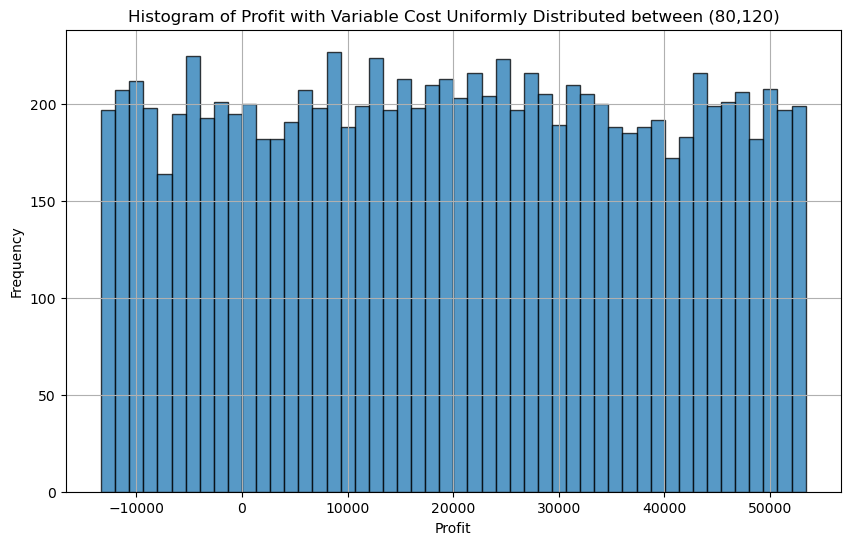

Probability that profit is negative: 0.1985


In [19]:

# Create an instance of the model
model = SingleProductSPF(selling_price=115)

# Number of simulations to limit
num_simulations = 10000

# Simulate profit with variable cost between $80 and $120
simulation_results_df = model.simulate_profit(num_simulations)

# Extract profit values
profits = simulation_results_df['profit']

# Plot histogram of profit
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=50, edgecolor='k', alpha=0.75)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit with Variable Cost Uniformly Distributed between (80,120)')
plt.grid(True)
plt.show()

# Calculate the probability of negative profit
negative_profit_probability = np.mean(profits < 0)
print(f'Probability that profit is negative: {negative_profit_probability:.4f}')
